<a href="https://colab.research.google.com/github/KaiaX926/P-MNIST-41milestone/blob/main/5241_Milestone_0403.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Preparation

In [1]:
import torchvision
import numpy as np
import matplotlib.pyplot as plt


In [2]:
DOWNLOAD_MNIST = True # If already download , set as False
train_data = torchvision . datasets . MNIST (
  root ='./ mnist /',
  train = True , # this is training data
  # transform = torchvision . transforms . ToTensor () ,
  download = DOWNLOAD_MNIST ,
)
test_data = torchvision . datasets . MNIST ( root ='./ mnist /', train = False )

# change the features to numpy
X_train = train_data . train_data . numpy ()
X_test = test_data . test_data . numpy ()

# change the labels to numpy
Y_train = train_data . train_labels . numpy ()
Y_test = test_data . test_labels . numpy ()

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


# 2.Data Processing

## **(a)** 
Plot one sample in X train. What is the number you see from the 28 × 28 pixel-field? Does it match with the label in Y train?

A: Yes. The image of figure 3 has the label as 3


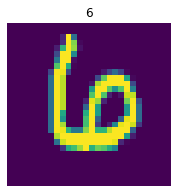

In [3]:
image_idx = np.random.choice(range(X_train.shape[0]))
image = X_train[image_idx]
image_class = Y_train[image_idx]
plt.figure(figsize=(3, 3))
plt.imshow(X_train[image_idx].astype("uint8"))
plt.title(image_class)
_ = plt.axis("off")

## **(b)** 
What is the dimension of X train and X test? Normalize X train and X test such that the value of each element lies in [0, 1].

In [4]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [5]:
np.max(X_train),np.min(X_train),np.max(X_test),np.min(X_test)

(255, 0, 255, 0)

In [6]:
X_train_normalized = X_train/255
X_test_normalized = X_test/255

# for i in range(len(X_train)):
#   X_train_normalized[i] = (X_train[i] - np.mean(X_train[i])) / np.std(X_train[i])

# for i in range(len(X_test)):
#   X_test_normalized[i] = (X_test[i] - np.mean(X_test[i])) / np.std(X_test[i])

print(X_train_normalized.shape, X_test_normalized.shape)
print(np.max(X_train_normalized), np.min(X_train_normalized),np.max(X_test_normalized), np.min(X_test_normalized))

(60000, 28, 28) (10000, 28, 28)
1.0 0.0 1.0 0.0


## **(c)** 
A popular choice to deal with the labels is to use the one-hot embedding. Represent
Y train and Y test using one-hot embedding. List the benefit of such transformation.

In [7]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(Y_train, num_classes=10)
test_labels = to_categorical(Y_test, num_classes=10)
print(train_labels.shape, np.unique(train_labels))

(60000, 10) [0. 1.]


1. It eliminates the influence of the numeric value labels in prediction. For example, the computer might assume group 1 is closer to group 2 than to group 9. However, the distance between them is not affected by the group number at all.
2. If the tags are strings, one-hot embedding will help transfer the labels into numbers for predictions.

# 3. Before Deep Learning

## **(a)** 
Try to implement and train the above mentioned classifier on the training
dataset, and report the test errors of them using the test dataset. Can you reproduce
the results? If not, please justify your reason

A: The specific test error cannot be reproduced since the random state is not anchored. The accuracies of KNN and SVM are similar to the output in the paper while the outcome of Adaboost is much lower than expected. I guess it's because there are so many parameters that need to be specified in Adaboost. Also, the decision tree is prone to overfit, which may make it a bad predictor in this condition.

In [8]:
def errorrate(y_pred, y_true):
  error = sum([y_pred[i]!=y_true[i] for i in range(len(y_true))])
  return error/len(y_true)

### KNN

In [9]:
# x_train = np.reshape(X_train_normalized,(60000,28*28))
# x_test = np.reshape(X_test_normalized,(10000,28*28))

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(np.reshape(X_train_normalized,(60000,28*28)),Y_train)
knn_prediction = KNN.predict(np.reshape(X_test_normalized,(10000,28*28)))
KNN_accuracy = accuracy_score(Y_test, knn_prediction)
print('Test Error of KNN is: ', errorrate(knn_prediction,Y_test))
print('Accuracy_score of KNN is: ', KNN_accuracy)

Test Error of KNN is:  0.0335
Accuracy_score of KNN is:  0.9665


### AdaBoost

In [11]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier(n_estimators=500, learning_rate=0.1)
ABC.fit(np.reshape(X_train_normalized,(60000,28*28)),Y_train)
abc_prediction = ABC.predict(np.reshape(X_test_normalized,(10000,28*28)))
ABC_accuracy = accuracy_score(Y_test, abc_prediction)
print('Test Error of AdaBoost is: ', errorrate(abc_prediction,Y_test))
print('Accuracy_score of AdaBoost is: ', ABC_accuracy)

Test Error of AdaBoost is:  0.1825
Accuracy_score of AdaBoost is:  0.8175


### SVM

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
SVM = SVC(kernel='rbf')
SVM.fit(np.reshape(X_train_normalized,(60000,28*28)),Y_train)
svm_prediction = SVM.predict(np.reshape(X_test_normalized,(10000,28*28)))
SVM_accuracy = accuracy_score(Y_test, svm_prediction)
print('Test Error of SVM is: ', errorrate(svm_prediction,Y_test))
print('Accuracy_score of SVM is: ', SVM_accuracy)

Test Error of SVM is:  0.0208
Accuracy_score of SVM is:  0.9792


## **(b)**
Pick your favorite classifier (not limited to the above mentioned algorithms)
and try to implement it on the training set and report the test error using the test
dataset. Turn the hyperparameters until it out perform all three of the classifier you
implemented in part 2(a).

### SVM GridSearchCV

In [13]:
# from sklearn.model_selection import GridSearchCV

# #parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid', 'precomputed'), 'C':[1, 5]}
# #parameters = {'C':[0.1, 0.5, 1, 2],'degree':[3,4,5]}
# parameters = {'degree':[3,4,5,6,7]}

# clf_svc = SVC(kernel = 'poly')
# clf = GridSearchCV(clf_svc, parameters, refit=True)
# clf.fit(np.reshape(X_train_normalized,(60000,28*28)),Y_train)
# #print('The model we pick is SVM with:', clf.best_params_())
# clf_prediction = clf.predict(np.reshape(X_test_normalized,(10000,28*28)))
# clf_accuracy = accuracy_score(Y_test, clf_prediction)
# print('Test Error of a better SVM is: ', errorrate(clf_prediction,Y_test))
# print('Accuracy_score of a better SVM is: ', clf_accuracy)

### Gaussian Navie Bayesian

In [14]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(np.reshape(X_train_normalized,(60000,28*28)),Y_train)
gnb_prediction = gnb.predict(np.reshape(X_test_normalized,(10000,28*28)))
gnb_accuracy = accuracy_score(Y_test, gnb_prediction)
print('Test Error of a better GaussianNB is: ', errorrate(gnb_prediction,Y_test))
print('Accuracy_score of a better GaussianNB is: ', gnb_accuracy)

Test Error of a better GaussianNB is:  0.4442
Accuracy_score of a better GaussianNB is:  0.5558


#CNN

In [15]:
import numpy as np
from matplotlib import pyplot as plt
from torchvision import datasets, transforms

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

#import helper
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# moves your model to train on your gpu if available else it uses your cpu
device = ("cuda" if torch.cuda.is_available() else "cpu")

In [16]:
# Define transform to normalize data
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))
                                ])



# Download and load the training data
train_set = datasets.MNIST('DATA_MNIST/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

test_set = datasets.MNIST('DATA_MNIST/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

In [17]:
class Network(nn.Module):

    def __init__(self):
        super(Network, self).__init__()
        # Convolutional Neural Network Layer 
        self.convolutaional_neural_network_layers = nn.Sequential(
                # Here we are defining our 2D convolutional layers
                # We can calculate the output size of each convolutional layer using the following formular
                # outputOfEachConvLayer = [(in_channel + 2*padding - kernel_size) / stride] + 1
                # We have in_channels=1 because our input is a grayscale image
                nn.Conv2d(in_channels=1, out_channels=12, kernel_size=3, padding=1, stride=1), # (N, 1, 28, 28) 
                nn.ReLU(),
                # After the first convolutional layer the output of this layer is:
                # [(28 + 2*1 - 3)/1] + 1 = 28. 
                nn.MaxPool2d(kernel_size=2), 
                # Since we applied maxpooling with kernel_size=2 we have to divide by 2, so we get
                # 28 / 2 = 14
          
                # output of our second conv layer
                nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, padding=1, stride=1),
                nn.ReLU(),
                # After the second convolutional layer the output of this layer is:
                # [(14 + 2*1 - 3)/1] + 1 = 14. 
                nn.MaxPool2d(kernel_size=2) 
                # Since we applied maxpooling with kernel_size=2 we have to divide by 2, so we get
                # 14 / 2 = 7
        )

        # Linear layer
        self.linear_layers = nn.Sequential(
                # We have the output_channel=24 of our second conv layer, and 7*7 is derived by the formular 
                # which is the output of each convolutional layer
                nn.Linear(in_features=24*7*7, out_features=64),          
                nn.ReLU(),
                nn.Dropout(p=0.2), # Dropout with probability of 0.2 to avoid overfitting
                nn.Linear(in_features=64, out_features=10) # The output is 10 which should match the size of our class
        )

    # Defining the forward pass 
    def forward(self, x):
        x = self.convolutaional_neural_network_layers(x)
        # After we get the output of our convolutional layer we must flatten it or rearrange the output into a vector
        x = x.view(x.size(0), -1)
        # Then pass it through the linear layer
        x = self.linear_layers(x)
        # The softmax function returns the prob likelihood of getting the input image. 
        # We will see a much graphical demonstration below
        x = F.log_softmax(x, dim=1)
        return x

In [18]:
model = Network()
model.to(device)
print(model)

Network(
  (convolutaional_neural_network_layers): Sequential(
    (0): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=1176, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=10, bias=True)
  )
)


In [19]:
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [20]:
epochs = 20 # The total number of iterations

train_losses = []
test_losses = []

for epoch in range(epochs):
    # prep model for training
    model.train()
    train_loss = 0

    for idx, (images, labels) in enumerate(trainloader): 

        # Send these >>> To GPU
        images = images.to(device)
        labels = labels.to(device)

        # Training pass
        optimizer.zero_grad()

        # Forward pass
        output = model(images)
        loss = criterion(output, labels)

        #Backward pass
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
    else:
        # prep model for evaluation
        model.eval() 
        test_loss = 0
        accuracy = 0

        # Turn off the gradients when performing validation.
        # If we don't turn it off, we will comprise our networks weight entirely
        with torch.no_grad():
            for images, labels in testloader:
                
                images = images.to(device)
                labels = labels.to(device)
                
                log_probabilities = model(images)
                test_loss += criterion(log_probabilities, labels)

                probabilities = torch.exp(log_probabilities)
                top_prob, top_class = probabilities.topk(1, dim=1)
                predictions = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(predictions.type(torch.FloatTensor))
        
        train_losses.append(train_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epoch: {}/{}  ".format(epoch+1, epochs),
              "Training loss: {:.4f}  ".format(train_loss/len(trainloader)),
              "Testing loss: {:.4f}  ".format(test_loss/len(testloader)),
              "Test accuracy: {:.4f}  ".format(accuracy/len(testloader)))


Epoch: 1/20   Training loss: 0.7558   Testing loss: 0.2613   Test accuracy: 0.9251  
Epoch: 2/20   Training loss: 0.2686   Testing loss: 0.1618   Test accuracy: 0.9499  
Epoch: 3/20   Training loss: 0.1904   Testing loss: 0.1100   Test accuracy: 0.9658  
Epoch: 4/20   Training loss: 0.1514   Testing loss: 0.0899   Test accuracy: 0.9719  
Epoch: 5/20   Training loss: 0.1282   Testing loss: 0.0852   Test accuracy: 0.9724  
Epoch: 6/20   Training loss: 0.1107   Testing loss: 0.0646   Test accuracy: 0.9790  
Epoch: 7/20   Training loss: 0.0994   Testing loss: 0.0645   Test accuracy: 0.9779  
Epoch: 8/20   Training loss: 0.0901   Testing loss: 0.0609   Test accuracy: 0.9797  
Epoch: 9/20   Training loss: 0.0833   Testing loss: 0.0577   Test accuracy: 0.9804  
Epoch: 10/20   Training loss: 0.0762   Testing loss: 0.0594   Test accuracy: 0.9795  
Epoch: 11/20   Training loss: 0.0720   Testing loss: 0.0469   Test accuracy: 0.9856  
Epoch: 12/20   Training loss: 0.0690   Testing loss: 0.0490   T

In [21]:
print('Final Accuracy_score of a CNN is:', accuracy/len(testloader))

Final Accuracy_score of a CNN is: tensor(0.9889)


In [22]:
# cnn_prediction = model.predict(X_test)
# cnn_accuracy = accuracy_score(Y_test, cnn_prediction)
# print('Test Error of a better CNN is: ', errorrate(cnn_prediction,Y_test))
# print('Accuracy_score of a better CNN is: ', cnn_accuracy)